# MULTIVARIATE ANALYSIS

#### Importing Important Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


#### Importing the Dataset

In [38]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


#### Checking Null or Missing Values

In [11]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

#### Checking Duplicate Values and Removing Duplicates from the Dataset

In [12]:
# Check for duplicates and count them
print(f"Total number of duplicates: {df.duplicated().sum()}")

# Display all rows that are duplicated, sorted by all columns
duplicates = df.loc[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())
print(duplicates)

# Remove duplicates
df = df.drop_duplicates()

# Verify duplicates are removed
print(f"Total number of duplicates after removal: {df.duplicated().sum()}")

Total number of duplicates: 562
     Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
670   10         100           50   6.0      99.0         70   mid risk
849   10         100           50   6.0      99.0         70   mid risk
552   12          90           60   7.5     102.0         60   low risk
940   12          90           60   7.5     102.0         60   low risk
543   12          90           60   7.5     102.0         66   low risk
..   ...         ...          ...   ...       ...        ...        ...
553   60         120           85  15.0      98.0         60   mid risk
772   60         120           85  15.0      98.0         60   mid risk
818   60         120           85  15.0      98.0         60   mid risk
114   63         140           90  15.0      98.0         90  high risk
502   63         140           90  15.0      98.0         90  high risk

[866 rows x 7 columns]
Total number of duplicates after removal: 0


#### Normalizing the dataset

In [13]:
# Separate features and target variable
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the feature set
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Combine the scaled features with the target variable
df_scaled = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# Display the first few rows of the normalized data
print(df_scaled.head())

        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  RiskLevel
0 -0.305021    1.089310     0.333484  2.354439 -0.491351   1.479009  high risk
1  0.422139    1.649455     1.061321  1.646744 -0.491351  -0.484676  high risk
2 -0.014157   -1.151273    -0.394352 -0.122492  0.927758   0.742627  high risk
3  0.058559    1.649455     0.697402 -0.476340 -0.491351  -0.484676  high risk
4  0.422139    0.529164    -1.122188 -0.794802 -0.491351   0.251706   low risk


## Doing Multivariate Analysis

1. Age -> Integer -> Age of the pregnant mother
2. Systolic BP -> Integer -> The top number (The pressure in thearteries when the heart is beating and sending blood into the arteries)
3. Diastolic BP -> Integer -> The bottom number (The pressure in the arteries when the heart rests between beats)
4. Blood Sugar -> Float -> Sugar level of body
5. Body Temp -> Float -> Temperature of the body in Fahrenheit
6. Heart Rate -> Integer -> Number of beats in a minute / Speed at which a heart beats
7. Risk Level -> Object -> The level of risk that a pregnant mother is entitled to

### Defining Risk Order and Colours

In [15]:
p_colors = ['forestgreen', 'gold', 'red']
risk_order = ["low risk", "mid risk", "high risk"]

### 1. Age, SystolicBP ---> Risk Level

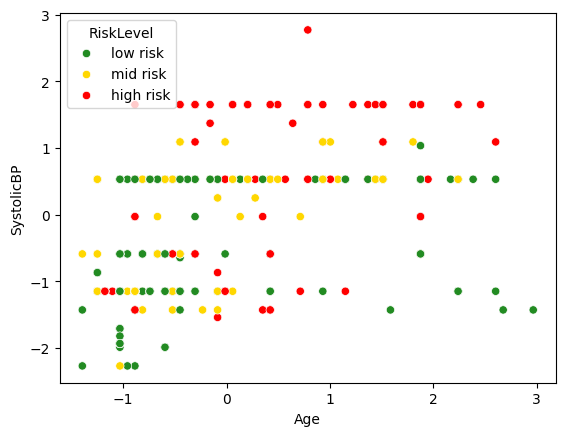

In [16]:
sns.scatterplot(data=df_scaled, x="Age", y="SystolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:
1. Pregnant women with high SystolicBP seems to have a high health risk, regardless of their age.
2. Having low SystolicBP at a young age doesn't guarantee that the health risk is low, but it seems to have it in old age makes our health risks lower.

### 2. Age, DiastolicBP ---> Risk Level

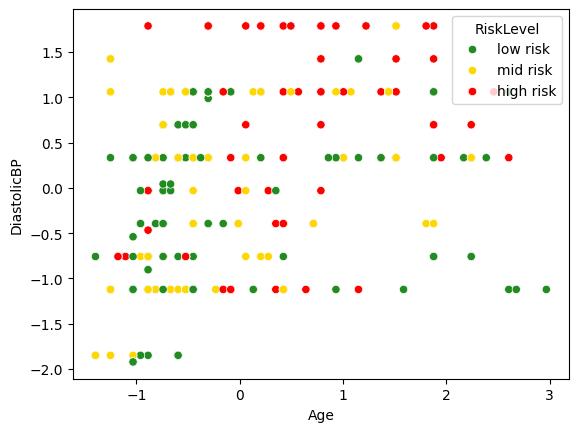

In [17]:
sns.scatterplot(data=df_scaled, x="Age", y="DiastolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:
  1. This is same Systolic BP observation. We can see a similar scatter plot.
  2. This is because the Systolic BP and the Diastolic BP is positively correlated.

### 3. Age, BS ---> Risk Level

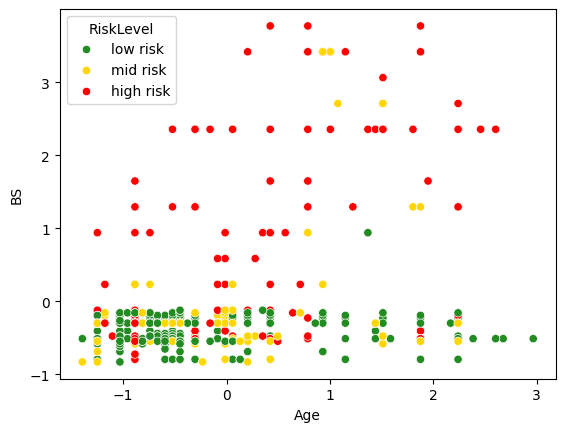

In [20]:
sns.scatterplot(data=df_scaled, x="Age", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:
   1. The mothers who have low blood sugar regardless of their age has low risk with pregnancy.
   2. The mothers who have high blood sugar regardless of their age has high risk.
   3. This indicates that the age factor doesn't matter when we consider blood sugar.

### 4. Age, Body Temp ---> Risk Level

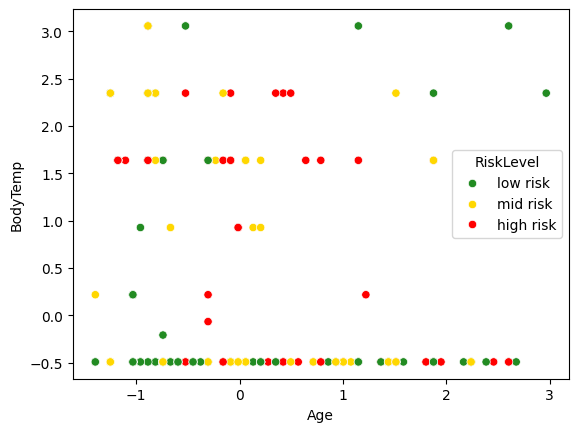

In [21]:
sns.scatterplot(data=df_scaled, x="Age", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:
1. Younger women with low normal body temperature seems to have low health risk, while younger women with high body temperature seems to have a high health risk.
2. Body temperature factor doesn't make any impact on older women.



### 5. Age, Heart Rate ---> Risk

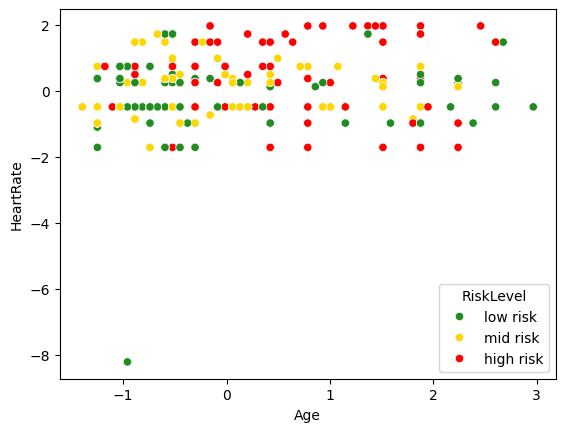

In [22]:
sns.scatterplot(data=df_scaled, x="Age", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:
  1. Even though we can see that regardless of the age, if the heart rate is normal, then the mothers have low health risk.
  2. However, as an overall view, we are able to see that heart rate has no impact on risk level because the points are scattered without a pattern.

### 6. Systolic BP, Diatolic BP ---> Risk Level

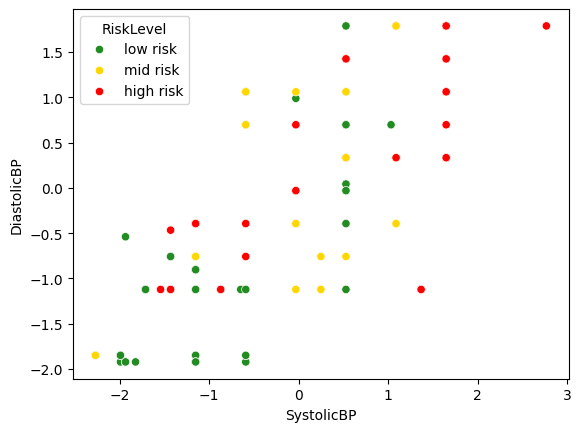

In [23]:
sns.scatterplot(data=df_scaled, x="SystolicBP", y="DiastolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:

  1. Mothers who have normal Systolic and Diastolic BP have low health risk.
  2. Mothers who have high Systolic and Diastolic BP have high health risk

### 7. Systolic BP, BS ---> Risk Level

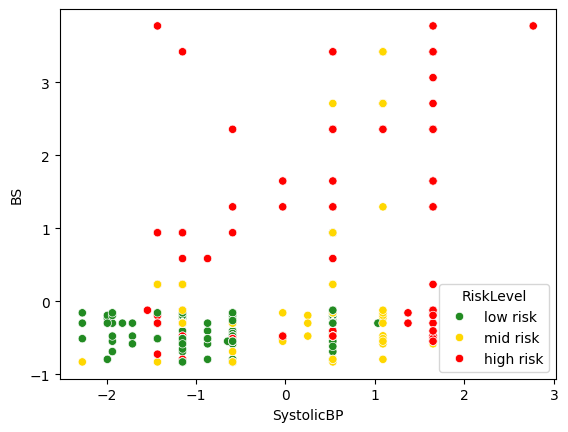

In [24]:
sns.scatterplot(data=df_scaled, x="SystolicBP", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:

  1. It is evident that mothers who have low Blood Sugar with normal Systolic BP have low health risk.
  2. Mothers who have high blood sugar with high Systolic BP have high health risk.
  3. We can see a pattern in this graph, which implies that the Systolic BP and the Blood Sugar have high impact on the maternal health risk.

### 8. Systolic BP, Body Temp ---> Risk Level

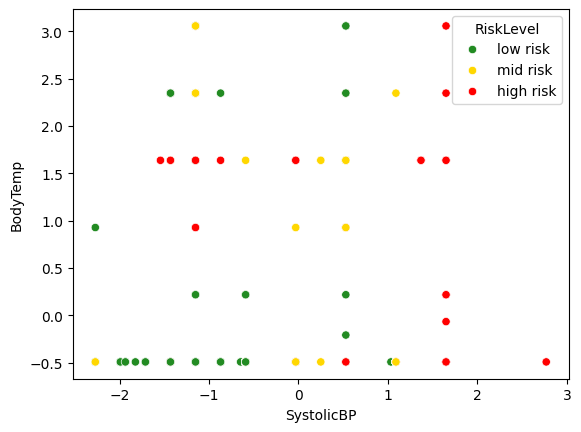

In [25]:
sns.scatterplot(data=df_scaled, x="SystolicBP", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:

  1. We can see same observation as in Systolic and Diastolic BP, where the mothers who have low body temperature and low Systolic BP have low risk and mothers who have high Systolic BP with high body temperature have high health risk.

### 9. Systolic BP, Heart rate ---> Risk Level

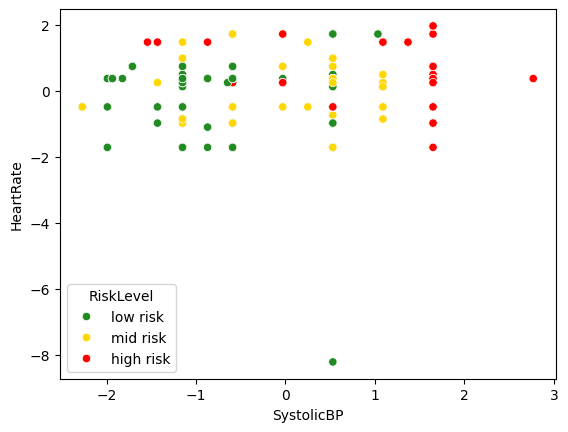

In [28]:
sns.scatterplot(data=df_scaled, x="SystolicBP", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:

  1. On a basic level we can say, mothers who have normal heart rate with normal Systolic BP have low health risk.
  2. However, the we are not able to clearly find a pattern in heart rate to find the risk level.
  3. It is evident that heart rate has less impact on maternal health risk.

### 10. Diastolic BP, BS ---> Risk Level

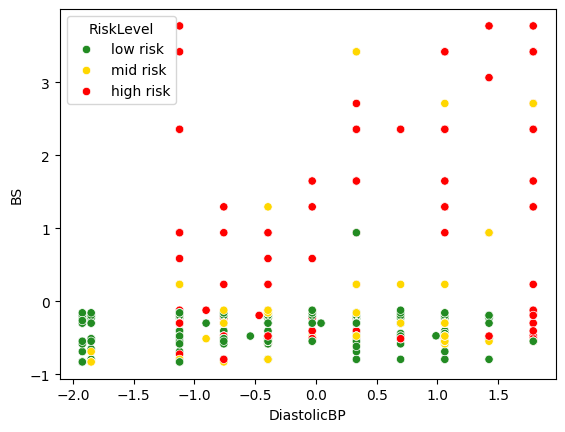

In [29]:
sns.scatterplot(data=df_scaled, x="DiastolicBP", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:

  1. Regardless of the Diastolic BP, if the mothers have normal Blood Sugar level, the health risk is low.
  2. However, when the Diastolic BP exceeds 100, we can see that the mothers are in high risk regardless of the Blood Sugar.
  3. It is evident that the mothers who have high blood sugar and high Diastolic BP have high health risk
  4. We can come to a conclusion here that the mothers who have high blood sugar have high health risk regardless of the Diastolic BP until the BP exceeds 100, because after that the impacting factor is Diastolic BP, and not the Blood Sugar.

### 11. Diastolic BP, Body Temp ---> Risk Level

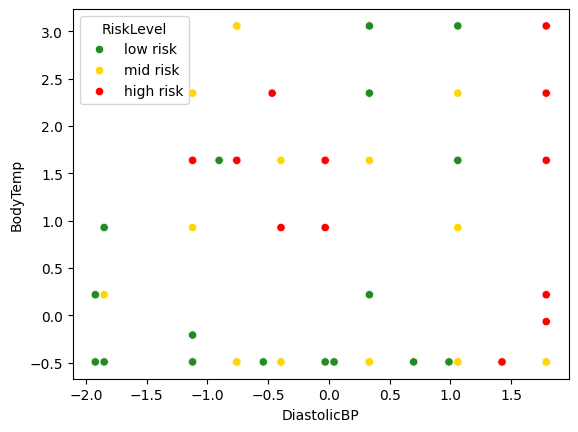

In [30]:
sns.scatterplot(data=df_scaled, x="DiastolicBP", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:

  1. Mothers who have low Diastolic BP and low Body temperature have low health risk.
  2. Mothers who have high Diastolic Bp and high Body temperature have high health risk.
  3. regardless of the Body temperature, Diastolic BP impacts the health risk when Diastolic BP exceeds 100.

### 12. Diastolic BP, Heart Rate ---> Risk Level

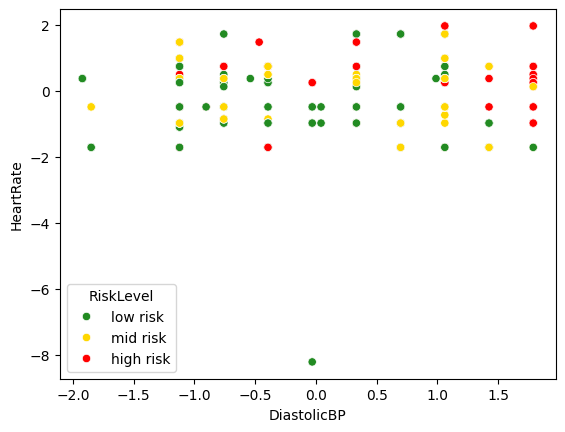

In [31]:
sns.scatterplot(data=df_scaled, x="DiastolicBP", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:

  1. Regardless of the heart rate, the mothers who have low Diastolic BP have low health risk and the mothers who have high Diastolic BP have high health risk.
  2. Again, it is evident that the heart rate does not impact the health risk of pregnant mothers.

### 13. BS, Body Temp ---> Risk Level

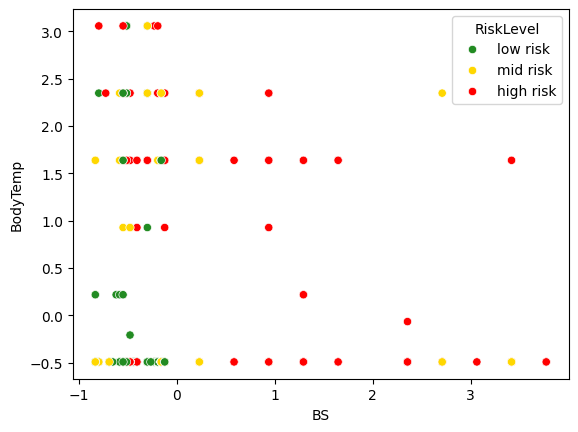

In [32]:
sns.scatterplot(data=df_scaled, x="BS", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:

  1. regardless of body temperature, mothers who have high Blood Sugar have high health risk.
  2. However, if the body temperature exceeds 100, we can see that the impacting factor is body temperature and not Blood Sugar.

### 14. BS, Heart Rate ---> Risk Level

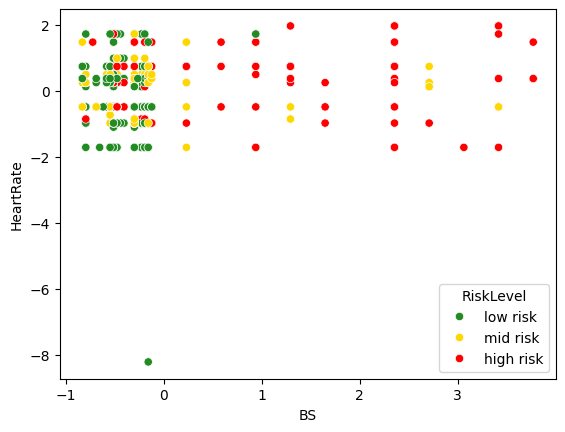

In [35]:
sns.scatterplot(data=df_scaled, x="BS", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:

  1. Regardless of heart rate, the mothers who have low Blood sugar level have low health risk.
  2. Mothers who have high blood sugar have high health risk.

### 15. Body Temp, Heart Rate ---> Risk Level

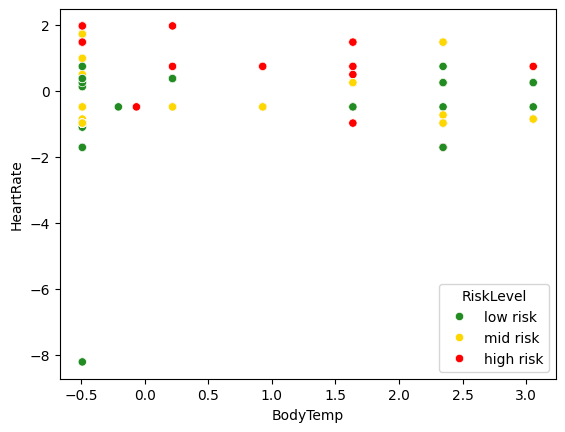

In [36]:
sns.scatterplot(data=df_scaled, x="BodyTemp", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

Observations:

  1. Regardless of the heart rate, pregnant mothers who have high body temperature have high health risk.
  2. However, even in normal body temperature and normal heart rate the data shows high health risk.

## Overall Observations

1. Heart rate is not an impactful factor in a pregnant mother's health risk.
2. Blood Sugar and Systolic BP have high impact in a pregnant mother's health risk.
3. Age and body temperature have a normal (medium range impact) on a pregnant mother's health. It depends upon the situation too.
4. Diastolic BP is correlated with Systolic BP therefore, it has an impact which is higher than the body temperature factor but lower that the Systolic BP factor.
5. Conclusion: Except heart rate, other factors have at least a small level of impact on the health risk. Therefore, it is better if we can remove the heart rate while building a model to decrease overfitting.

## Lasso Regularization Model

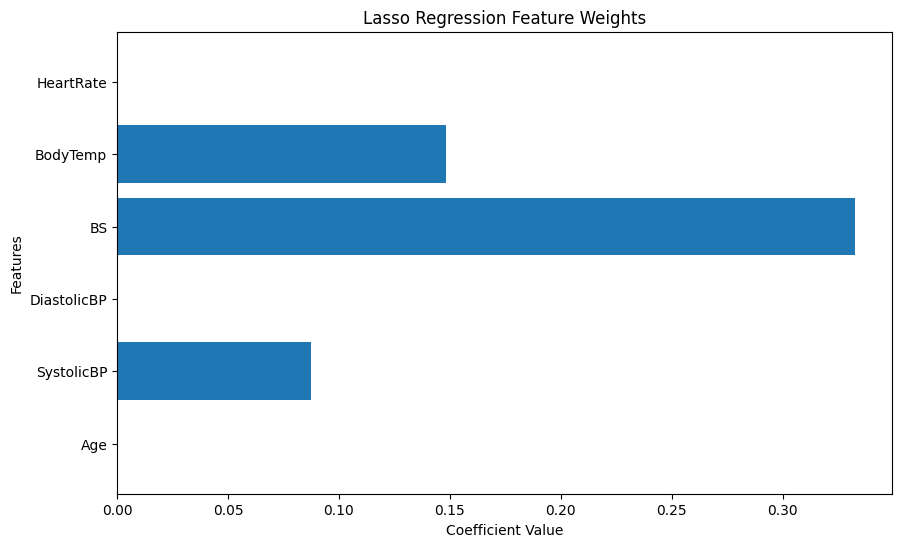

Lasso Regression Coefficients:
Age            0.000000
SystolicBP     0.087599
DiastolicBP    0.000000
BS             0.332677
BodyTemp       0.148434
HeartRate      0.000000
dtype: float64


In [41]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import pandas as pd

# Map RiskLevel to numeric values
risk_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
df_scaled['RiskLevel'] = df_scaled['RiskLevel'].map(risk_mapping)

# Separate features and target variable from the scaled dataset
X_scaled = df_scaled.drop('RiskLevel', axis=1)
y = df_scaled['RiskLevel']

# Apply Lasso Regression
lasso = Lasso(alpha=0.1)  # Alpha is the regularization strength
lasso.fit(X_scaled, y)
lasso_coefficients = pd.Series(lasso.coef_, index=X_scaled.columns)

# Plotting the Lasso coefficients
plt.figure(figsize=(10, 6))
plt.barh(X_scaled.columns, lasso_coefficients)
plt.title('Lasso Regression Feature Weights')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

# Print the Lasso coefficients to inspect the differences
print("Lasso Regression Coefficients:")
print(lasso_coefficients)

When changing the weight of the Lasso Regression model, the regularisation changes.

## Ridge Regularization Model

In [52]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import pandas as pd

# Mapping RiskLevel to numeric values
risk_mapping = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
df_scaled['RiskLevel'] = df_scaled['RiskLevel'].map(risk_mapping)

# Verify the mapping and check for NaNs after mapping
print(f"NaN values in 'RiskLevel': {df_scaled['RiskLevel'].isna().sum()}")

# Drop rows with NaN values in 'RiskLevel' if any
df_scaled = df_scaled.dropna(subset=['RiskLevel'])

# Verify the dataset dimensions after dropping NaNs from 'RiskLevel'
print(f"df_scaled shape after dropping NaNs in 'RiskLevel': {df_scaled.shape}")

# Separate features and target variable from the scaled dataset
X_scaled = df_scaled.drop('RiskLevel', axis=1)
y = df_scaled['RiskLevel']

# Verify the dataset dimensions after separating X_scaled and y
print(f"X_scaled shape: {X_scaled.shape}")
print(f"y shape: {y.shape}")

# Check for NaN values in the feature columns of X_scaled before dropping
print(f"NaN values in X_scaled: {X_scaled.isna().sum()}")

# Check the shape of X_scaled and y before dropping NaN rows
print(f"Before dropping NaN rows - X_scaled shape: {X_scaled.shape}, y shape: {y.shape}")

# Drop rows with NaN values in X_scaled (if any)
X_scaled = X_scaled.dropna()

# Drop corresponding rows in y to keep alignment
y = y[X_scaled.index]

# Check the shape of X_scaled and y after dropping NaN rows
print(f"After dropping NaN rows - X_scaled shape: {X_scaled.shape}, y shape: {y.shape}")

# Proceed with Ridge Regression only if there are samples remaining
if X_scaled.shape[0] > 0:
    # Apply Ridge Regression
    ridge = Ridge(alpha=0.2)
    ridge.fit(X_scaled, y)
    ridge_coefficients = pd.Series(ridge.coef_, index=X_scaled.columns)

    # Plotting the Ridge coefficients
    plt.figure(figsize=(10, 6))
    plt.barh(X_scaled.columns, ridge_coefficients)
    plt.title('Ridge Regression Feature Weights')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.show()

    # Print the Ridge coefficients to inspect the differences
    print("Ridge Regression Coefficients:")
    print(ridge_coefficients)
else:
    print("No samples remaining after preprocessing.")

NaN values in 'RiskLevel': 0
df_scaled shape after dropping NaNs in 'RiskLevel': (0, 7)
X_scaled shape: (0, 6)
y shape: (0,)
NaN values in X_scaled: Age            0.0
SystolicBP     0.0
DiastolicBP    0.0
BS             0.0
BodyTemp       0.0
HeartRate      0.0
dtype: float64
Before dropping NaN rows - X_scaled shape: (0, 6), y shape: (0,)
After dropping NaN rows - X_scaled shape: (0, 6), y shape: (0,)
No samples remaining after preprocessing.


Here, Ridge regression doesn't seem to be working.

## Elastic Net regularization

In [53]:
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
import pandas as pd

# Separate features and target variable from the scaled dataset
X_scaled = df_scaled.drop('RiskLevel', axis=1)
y = df_scaled['RiskLevel']

# Print the dimensions of X_scaled and y before further processing
print(f"Before further processing - X_scaled shape: {X_scaled.shape}, y shape: {y.shape}")

# Check for NaN values in the feature columns of X_scaled before dropping
print(f"NaN values in X_scaled: {X_scaled.isna().sum()}")

# Drop rows with NaN values in X_scaled (if any)
X_scaled = X_scaled.dropna()

# Drop corresponding rows in y to keep alignment
y = y[X_scaled.index]

# Print the dimensions of X_scaled and y after dropping NaN rows
print(f"After dropping NaN rows - X_scaled shape: {X_scaled.shape}, y shape: {y.shape}")

# Apply Elastic Net Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Alpha is the regularization strength, l1_ratio controls the mix of L1 and L2 penalties

# Check if X_scaled and y have at least one sample before fitting the model
if X_scaled.shape[0] > 0:
    elastic_net.fit(X_scaled, y)
    elastic_net_coefficients = pd.Series(elastic_net.coef_, index=X_scaled.columns)

    # Plotting the Elastic Net coefficients
    plt.figure(figsize=(10, 6))
    plt.barh(X_scaled.columns, elastic_net_coefficients)
    plt.title('Elastic Net Regression Feature Weights')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.show()

    # Print the Elastic Net coefficients to inspect the differences
    print("Elastic Net Regression Coefficients:")
    print(elastic_net_coefficients)
else:
    print("No valid data points after preprocessing. Cannot fit the model.")

Before further processing - X_scaled shape: (0, 6), y shape: (0,)
NaN values in X_scaled: Age            0.0
SystolicBP     0.0
DiastolicBP    0.0
BS             0.0
BodyTemp       0.0
HeartRate      0.0
dtype: float64
After dropping NaN rows - X_scaled shape: (0, 6), y shape: (0,)
No valid data points after preprocessing. Cannot fit the model.


## Overall Observation on Regularization Models

The Lasso regularisation regularises the dataset but what we concluded using multivariate analysis is not the same when we use lasso regularization.